

```

```

Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

loading dataset into pandas dataframe

In [2]:
# cols = ['target','id','date','flag','user','text']
twitter_df = pd.read_csv('/content/drive/MyDrive/Datasets/twitter_tweets_data.csv',encoding="ISO-8859-1",names=["sentiment", "ids", "date", "flag", "user", "text"])

In [3]:
# first five rows of the dataset
twitter_df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
twitter_df.shape

(1600000, 6)

In [5]:
# columns in dataset
twitter_df.columns 

Index(['sentiment', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
# getting information about the dataset
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
# changing the columns name
twitter_df = twitter_df.rename(columns = {'text':'tweet'})

In [8]:
twitter_df.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
twitter_df = twitter_df[['sentiment','tweet']]

In [10]:
twitter_df.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Data Preprocessing

In [11]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word,"",input_txt)
  return input_txt

In [12]:
twitter_df.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [13]:
twitter_df['tweet'].isnull().sum()

0

In [14]:
# removing twitter handles(@user)
twitter_df['clean_tweet'] = np.vectorize(remove_pattern)(twitter_df['tweet'], "@[\w]*")

In [15]:
twitter_df.head()

,sentiment,tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [16]:
# remove special characters, numbers and punctuations
twitter_df['clean_tweet'] = twitter_df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
twitter_df.head()

,sentiment,tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic com y zl Awww that s a bum...
1,0,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...


In [17]:
# remove short words
twitter_df['clean_tweet'] = twitter_df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
twitter_df.head()

,sentiment,tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic Awww that bummer shoulda David Ca...
1,0,is upset that he can't update his Facebook by ...,upset that update Facebook texting might resul...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball Managed save rest bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving here because over there


In [18]:
# individual words considered as tokens
tokenized_tweet = twitter_df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [http, twitpic, Awww, that, bummer, shoulda, D...
1    [upset, that, update, Facebook, texting, might...
2    [dived, many, times, ball, Managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4               [behaving, here, because, over, there]
Name: clean_tweet, dtype: object

In [19]:
# stemming the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [http, twitpic, awww, that, bummer, shoulda, d...
1    [upset, that, updat, facebook, text, might, re...
2    [dive, mani, time, ball, manag, save, rest, bo...
3               [whole, bodi, feel, itchi, like, fire]
4                   [behav, here, becaus, over, there]
Name: clean_tweet, dtype: object

In [20]:
# Combine words into single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])
twitter_df['clean_tweet'] = tokenized_tweet
twitter_df.head()

,sentiment,tweet,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic awww that bummer shoulda david ca...
1,0,is upset that he can't update his Facebook by ...,upset that updat facebook text might result sc...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behav here becaus over there


Exploratory Data Analysis

In [21]:
!pip install wordcloud

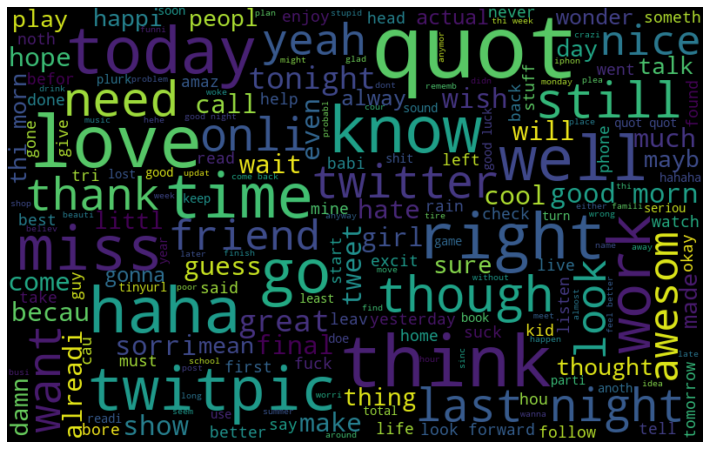

In [22]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in twitter_df['clean_tweet']])


from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42,max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

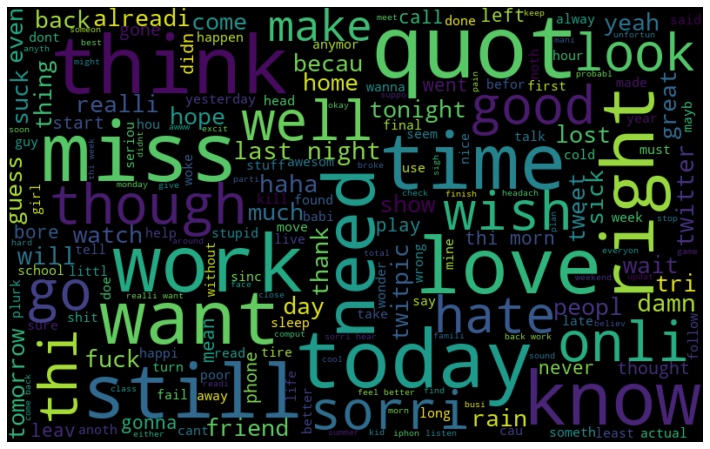

In [23]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in twitter_df['clean_tweet'][twitter_df['sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
twitter_df['sentiment'].replace({4:1},inplace=True)

In [25]:
twitter_df['sentiment'].value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

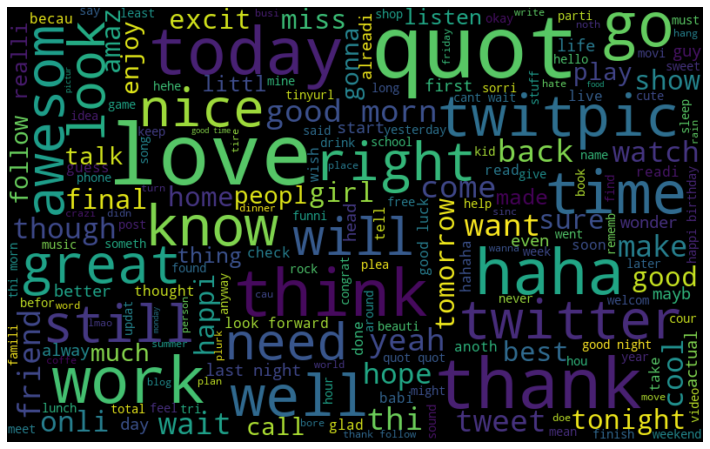

In [26]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in twitter_df['clean_tweet'][twitter_df['sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# extract the hashtags
def extract_hashtag(tweets):
  hashtags = []
  # loop words in the tweet
  for tweet in tweets:
    ht = re.findall(r"#(\w+)", tweet)
    hashtags.append(ht)
  return hashtags

In [28]:
# extract hashtags from non-racist/sexist tweets
ht_positive = extract_hashtag(twitter_df['clean_tweet'][twitter_df['sentiment']==0])

# extract hashtags from racist/sexist tweets
ht_negative = extract_hashtag(twitter_df['clean_tweet'][twitter_df['sentiment']==1])


In [29]:
ht_negative[:800]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['devun'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['alexa'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['japan', 'skype'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['explet'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [

In [30]:
# unnest list
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

In [31]:
ht_positive[:5]

['itm', 'therapyfail', 'ttsc', 'gayforpeavi', 'fml']

In [32]:
# frequently distribution of words
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,ttsc,1
3,gayforpeavi,1
4,fml,24


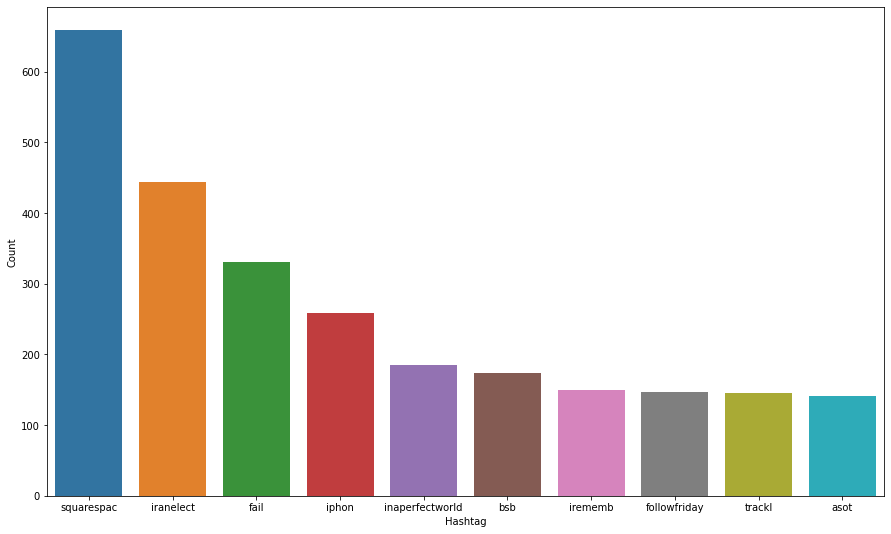

In [33]:
# selecting top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag', y='Count')
plt.show()

In [34]:
#frequently distribution of negative words
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                      'Count' : list(freq.values())})
d.head()


,Hashtag,Count
0,devun,1
1,alexa,1
2,japan,5
3,skype,3
4,explet,1


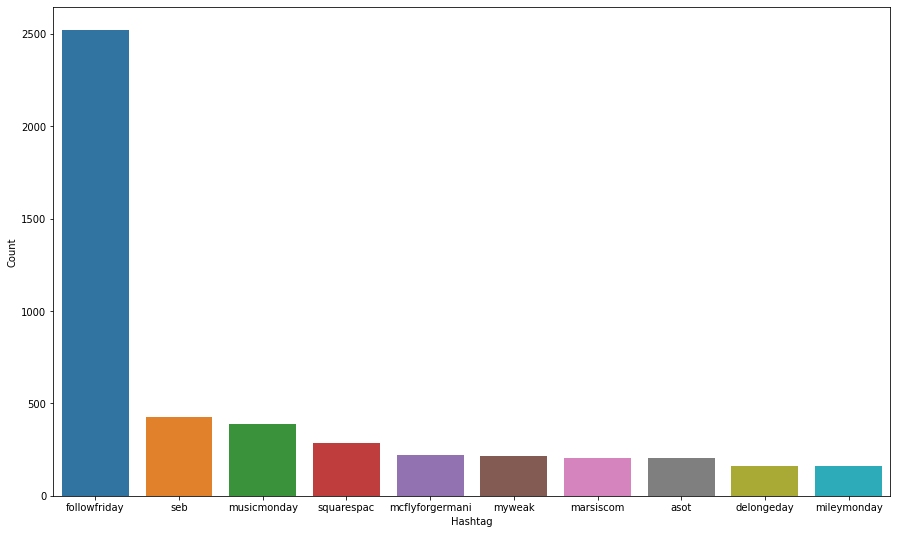

In [35]:
# selecting top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag', y='Count')
plt.show()

Feature Extraction

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(twitter_df['clean_tweet'])

In [37]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, twitter_df['sentiment'], random_state=42, test_size=0.25)

Model Training

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score,classification_report

In [40]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.7449662516802912

In [42]:
accuracy_score(y_test, pred)

0.73154

In [43]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.742829999174763

In [44]:
accuracy_score(y_test, pred)

0.6805775

In [45]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [46]:
y_pred = SVCmodel.predict(x_test)

In [47]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.67      0.71    199581\n           1       0.71      0.79      0.75    200419\n\n    accuracy                           0.73    400000\n   macro avg       0.73      0.73      0.73    400000\nweighted avg       0.73      0.73      0.73    400000\n'

In [48]:
LogisticModel = LogisticRegression(C = 2, max_iter = 1000, n_jobs = 1)
LogisticModel.fit(x_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=1)

In [49]:
y_pred = LogisticModel.predict(x_test)

In [50]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.68      0.72    199581\n           1       0.71      0.78      0.75    200419\n\n    accuracy                           0.73    400000\n   macro avg       0.73      0.73      0.73    400000\nweighted avg       0.73      0.73      0.73    400000\n'